In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import os
import ketu
import numpy as np
import matplotlib.pyplot as pl

In [38]:
campaign = 1
# epicid = "201393098"
# epicid = "201912552"
epicid = "201617985"
basepath = "/Users/dfm/data/k2"
light_curve_file = os.path.join(basepath, "lightcurves/c{0}".format(campaign),
                                "{0}00000/{1}000/ktwo{2}-c{3:02d}_lpd-lc.fits"
                                .format(epicid[:4], epicid[4:6], epicid, campaign))

query = dict(
    light_curve_file=light_curve_file,
    basis_file=os.path.join(basepath, "elcs/c{0}-norm.h5".format(campaign)),
    catalog_file=os.path.join(basepath, "catalogs/epic.h5"),
    nbasis=500,
    initial_time=1975.0,
    skip=50,
#     initial_time=2015.,
#     skip=0,
    durations=[0.05, 0.1, 0.2],
    min_period=1.,
    max_period=50.,
    npeaks=4,
    # use_gp=False,
)

In [39]:
pipe = ketu.k2.Data(cache=False)
pipe = ketu.k2.Likelihood(pipe, cache=False)
pipe = ketu.OneDSearch(pipe, cache=True)
pipe = ketu.IterativeTwoDSearch(pipe, cache=True)
pipe = ketu.Vetter(pipe, cache=False)

In [40]:
r = pipe.query(**query)

Querying Data
Finished querying Data in 0.64s
Querying Likelihood
tau = 1.95703125
tau = 1.95193481445
tau = 4.00207519531
tau = 3.99194335938
Finished querying Likelihood in 3.93s
Querying OneDSearch
Finished querying OneDSearch in 43.71s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 221.85s
Querying Vetter
  status: 0
 success: True
    nfev: 57
     fun: 1204.7942340334448
       x: array([ -3.49538891e+00,   1.98544588e+00,   4.63290055e+00,
         0.00000000e+00,  -2.97102169e+00,   2.12822313e-03,
         9.56112360e-04])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([ 0.6383108 , -9.01085246, -0.25974426,  0.        , -1.94791712,
       -0.02857456, -0.03458149])
     nit: 34
  status: 0
 success: True
    nfev: 24
     fun: 1195.7119184580911
       x: array([ -3.59343968e+00,   2.99420174e+00,   4.93740102e+00,
         0.00000000e+00,  -2.99576068e+00,   3.97872475e-06,
         1.09029608e-06])
 message: 'CONVERGENCE:

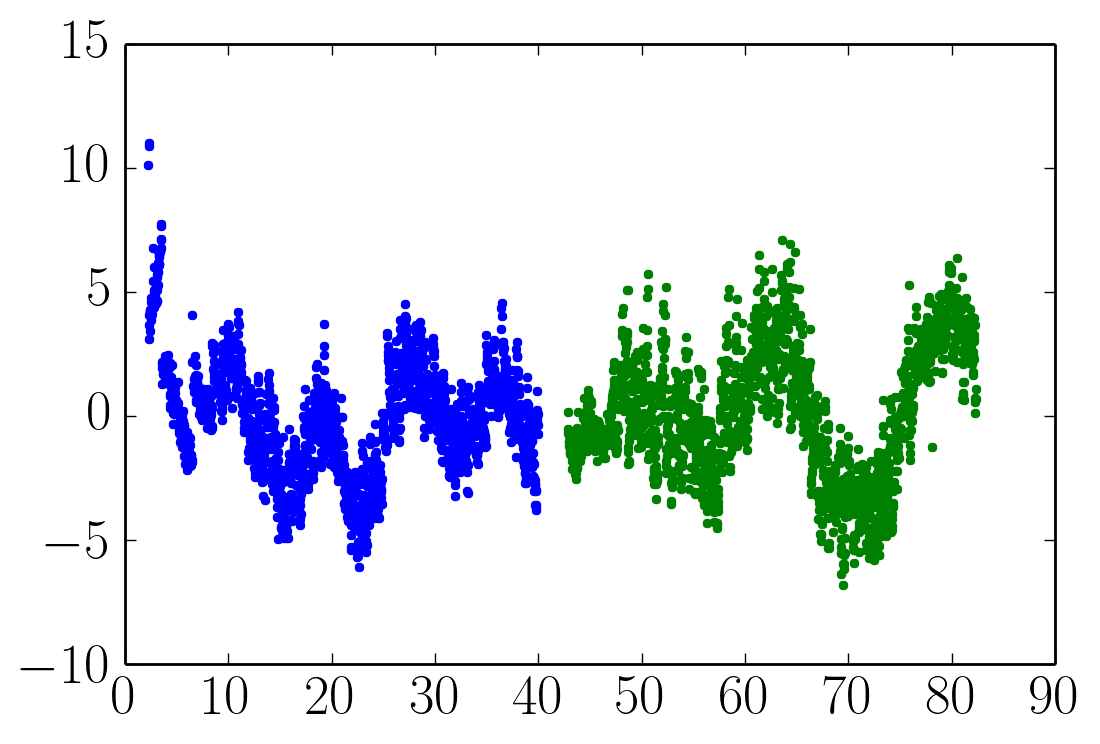

In [41]:
lcs = r.model_light_curves
[pl.plot(lc.time, lc.flux, ".") for lc in lcs];

In [42]:
lc = lcs[0]

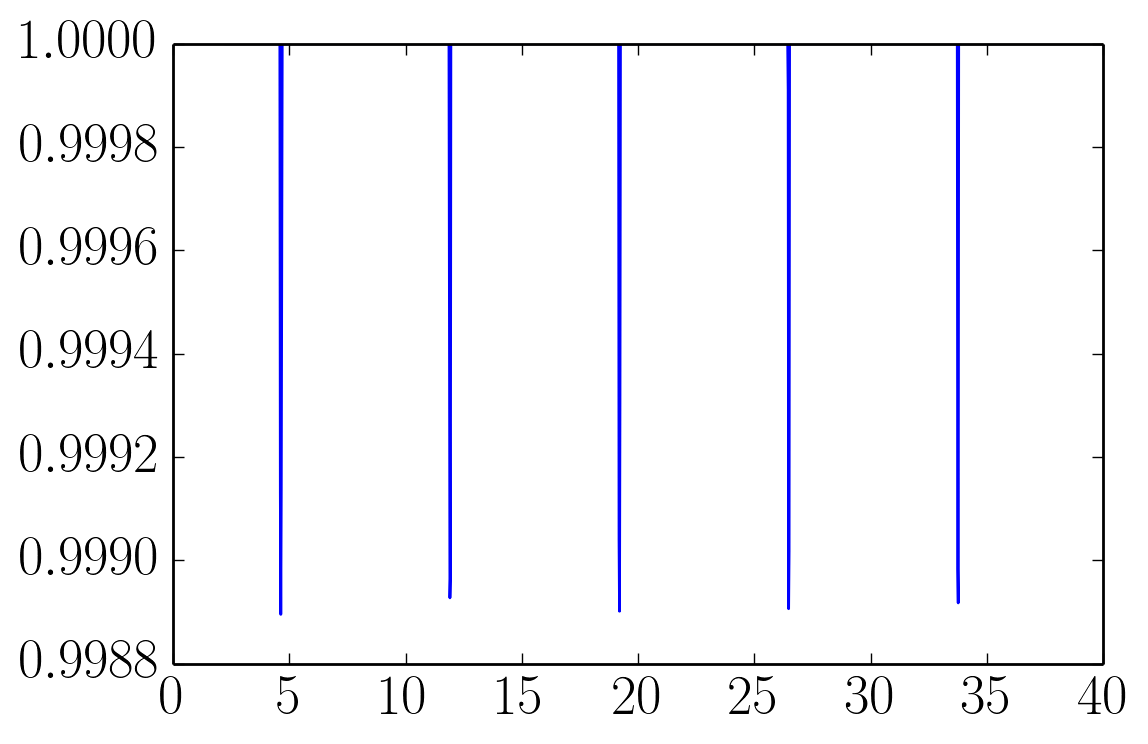

In [43]:
from transit import SimpleSystem
p = r.peaks[0]
s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

pl.plot(lc.time, s.light_curve(lc.time))

In [44]:
r.peaks

[{'depth': 0.7960470625011703,
  'depth_ivar': 74.63995045201095,
  'duration': 0.05,
  'lnZ_box': -1214.2417313889832,
  'lnZ_none': -1237.2590712236333,
  'lnZ_transit': -1219.3723950638985,
  'lnlike_box': -1212.0863025730157,
  'lnlike_none': -1237.2590712236333,
  'lnlike_transit': -1204.7942340334459,
  'period': 7.2805302492858379,
  's2n': 6.8774020747217186,
  't0': 4.6378173828124929,
  'transit_b': 0.0,
  'transit_duration': 0.051250921121127946,
  'transit_period': 7.2822937154324467,
  'transit_q1': 0.50053205558229419,
  'transit_q2': 0.50023902807172771,
  'transit_ror': 0.03033694794373264,
  'transit_t0': 4.6329005484641712},
 {'depth': 0.75631490644252108,
  'depth_ivar': 30.136392869419915,
  'duration': 0.05,
  'lnZ_box': -1196.9558859472816,
  'lnZ_none': -1204.7945830335259,
  'lnZ_transit': -1207.5578322204155,
  'lnlike_box': -1195.2967913660682,
  'lnlike_none': -1204.7945830335259,
  'lnlike_transit': -1195.711918458092,
  'period': 19.96869386703267,
  's2n':

(-2.1684100582297843, 3.8315899417702157)

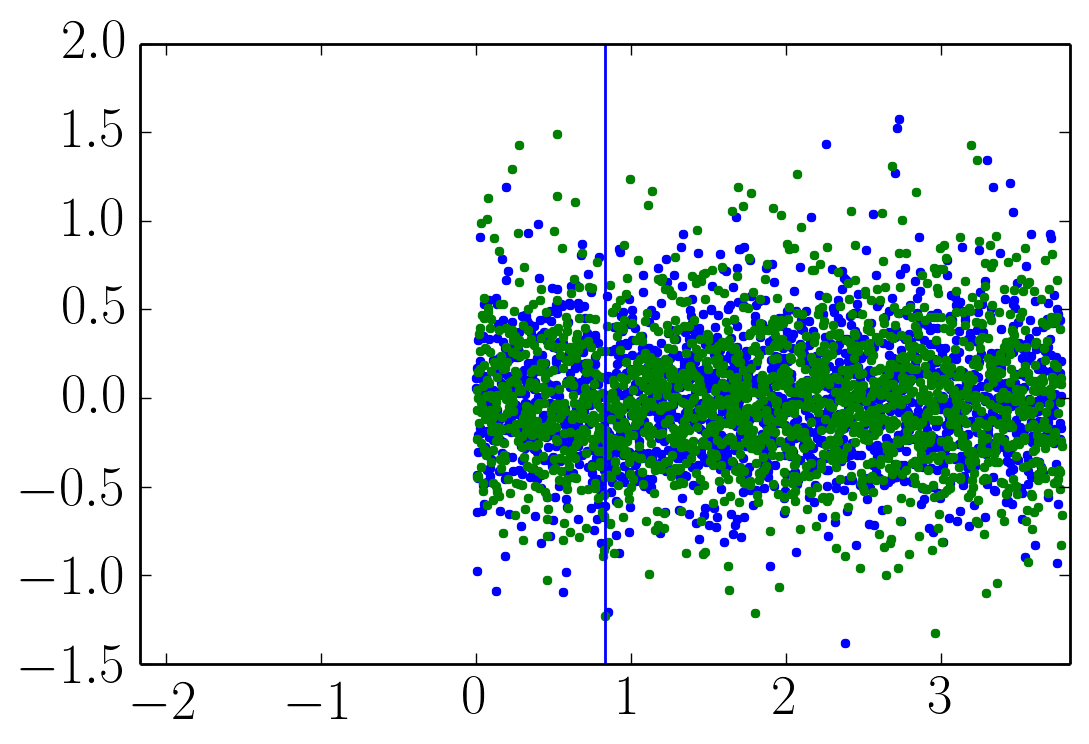

In [45]:
p = r.peaks[2]

s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

[pl.plot(lc.time % (p["transit_period"]), lc.flux - lc.predict(lc.flux - 1e3*(s.light_curve(lc.time)-1.0)), ".") for lc in lcs]
pl.gca().axvline(p["transit_t0"]);
pl.xlim(p["transit_t0"]-3, p["transit_t0"]+3)